## Pivot Tables: Data Aggregation tools in Python

![title](https://cdn-images-1.medium.com/max/1000/0*Ol4m2kahvJyzHeIY)

### Exploratory data analysis is an important phase of the Machine Learning projects. The wonderful Pandas library is equipped with several useful functions for this purpose. One among them is pivot_table that summarizes a feature's values in a neat two-dimensional table. The data summarization tool frequently found in data analysis software, offering a ton of flexibility. DataFrame has a pivot_table method(pandas.DataFrame.pivot_table), and additionally, there is a top-level pandas.pivot_table function(any of them can be used as per the convenience, both results in the same output). Most often we end up using pivot_table with the default parameters. This article will help you achieve more by optimal usage of the default parameters.

## **pivot_table()**
The pivot_table() method returns a DataFrame which is an Excel-style pivot table. The pivot table aggregates a table of data by one or more keys, arranging the data in a rectangle with some of the group keys along the rows and some along the columns into a two-dimensional table that provides a multidimensional summarization of the data.

### Syntax : pandas.DataFrame.pivot_table()

### Parameters :

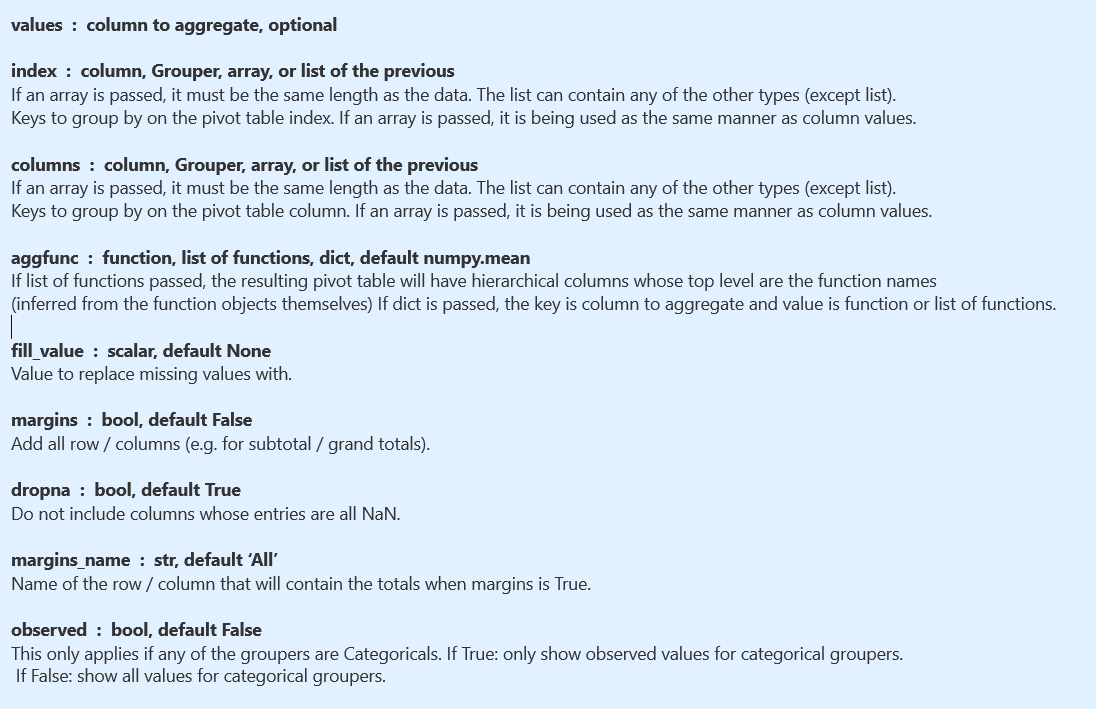

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np

In [ ]:
# Importing and Loading the data into data frame

market_df = pd.read_csv("../input/market.csv")
customer_df = pd.read_csv("../input/customer.csv")
product_df = pd.read_csv("../input/product.csv")
shipping_df = pd.read_csv("../input/shipping.csv")
orders_df = pd.read_csv("../input/order.csv")

# Merging the dataframes to create a master_df
df_1 = pd.merge(market_df, customer_df, how='inner', on='Cust_id')
df_2 = pd.merge(df_1, product_df, how='inner', on='Prod_id')
df_3 = pd.merge(df_2, shipping_df, how='inner', on='Ship_id')
master_df = pd.merge(df_3, orders_df, how='inner', on='Ord_id')


#### Extracting first few rows

In [ ]:
master_df.head()

In [ ]:
#Identifying Missing Values in Column
master_df.isnull().sum()

#### At this point, we barely have any idea of what dataset looks like. So let's now look into the usage of pivot_table() in multiple different ways to explore the data further.

### **1. group data using index in a pivot table**
Index is the column, grouper, array, or list we'd like to group our data by. The simplest pivot table requires a dataframe and an index . The index features will be displayed in the index column in the resultant table. By default, it will average all the numerical columns data when the value and aggfunc parameters are not specified.

In [ ]:
#a single index
#Using pandas.DataFrame.pivot_table
master_df.pivot_table(index = 'Customer_Segment')


In [ ]:
#Same as above - results in same output
#Using pandas.pivot_table
pd.pivot_table(master_df, index = 'Customer_Segment')

In [ ]:
#multiple indexes
master_df.pivot_table(index =['Customer_Segment','Product_Category'])

### **2. Aggregate on specific features with values**
The value parameter is where we tell the function which features to aggregate on. It is an optional field and if we don't specify this value, then the function will aggregate on all the numerical features of the dataset. In the previous example of indexes, we saw that the aggregation was done for all numerical columns. Since the value parameter was not specified, pivot_table, by default considered all numerical columns.

In [ ]:
#Single value
master_df.pivot_table(values = 'Sales', index = 'Customer_Segment')

In [ ]:
#multiple value
master_df.pivot_table(values = ['Order_Quantity','Sales'], index = 'Customer_Segment')

### **3. Manipulating the data using aggfunc**
As mentioned before, pivot_table uses mean function (numpy.mean) for aggregating or summarizing data by default. But there are other important function or list of functions to consider. aggfunc is an aggregate function that pivot_table applies to our grouped data. aggfunc (optional) accepts a function or list of functions we'd like to use in our group. The aggregation specification can be a string such as 'sum', 'mean', 'count', 'min', 'max', etc or a function that implements an aggregation (e.g. np.sum(), min(), sum(), etc). Now its time to experiment with the aggfunc parameter.

In [ ]:
#Single aggrigate function(mean) and single value
master_df.pivot_table(values = 'Sales', index = 'Customer_Segment', aggfunc = 'mean')

In [ ]:
#Single aggrigate function(sum) and single value
master_df.pivot_table(values = 'Order_Quantity', index = 'Region', aggfunc = 'sum')

In [ ]:
#Sum aggregate function is applied to both the values
master_df.pivot_table(values = ['Order_Quantity','Sales'], index = 'Product_Category', aggfunc='sum')

In [ ]:
#multiple Aggregating Function applied to single column
master_df.pivot_table(values = 'Sales', index = 'Product_Category', aggfunc=['sum', 'count'])

In [ ]:
#Sum and Mean aggregate function is applied to both the values
master_df.pivot_table(values = ['Order_Quantity','Sales'], index = 'Product_Category', aggfunc=[np.sum, np.mean])

In [ ]:
#different aggregate applied to different values
master_df.pivot_table(index = 'Product_Category', aggfunc = {'Order_Quantity':sum, 'Sales':'mean'})

### **4. relationship between features with columns parameter**
The column parameter displays the values horizontally on the top of the resultant table. Most of the time there is confusion with the pivot_table related to the use of columns and values . Bear in mind, columns are optional, they provide a supplementary way to segment the actual values we care about. The aggregation functions are applied to values we list.

In [ ]:
#Single column
#Grouping by both rows and column
master_df.pivot_table(values = 'Profit', 
                      index = 'Product_Category', 
                      columns = 'Customer_Segment', 
                      aggfunc = 'sum')

In [ ]:
#multiple columns
master_df.pivot_table(values = 'Profit', 
                      index = 'Customer_Segment', 
                      columns = ['Product_Category','Ship_Mode'], 
                      aggfunc = 'count')

### **5. Adding total rows/columns**
At times it's useful to compute totals along each grouping. Now, if we want to see some totals of the data, margins=True does that for us. margins is type boolean that adds all rows and columns (e.g. for subtotal / grand totals) and defaults to 'False'.

In [ ]:
#Margin
master_df.pivot_table(values = 'Profit', 
 index = 'Product_Category', 
 columns = 'Customer_Segment', 
 aggfunc = 'sum', margins=True)

In [ ]:
#margins_name
master_df.pivot_table(values = 'Profit', 
                      index = 'Product_Category', 
                      columns = 'Customer_Segment', 
                      aggfunc = 'sum', 
                      margins=True,
                      margins_name ='TOTAL')

### **6. Handling missing data**
The NaN's are a bit distracting. pivot_table helps us to deal with it through the parameters dropna and fill_value. Two of these options, fill_value and dropna, have to do with missing data and are fairly straightforward.
dropna is type boolean, and allows us to drop the null values in the grouped table whose entries are all NaN. It defaults to True.
fill_value is type scalar, and can be used to replace the NaN values in the table with the values that we provide. It defaults to None.

In [ ]:
#Displaying NaN values in the table
#These can be imputed using fill_value
master_df.pivot_table(values = 'Product_Base_Margin', 
                      index = 'Customer_Name', 
                     columns = 'Customer_Segment', 
                      aggfunc = 'mean')

In [ ]:
#imputing with mean using fill_value
master_df.pivot_table(values = 'Product_Base_Margin', 
                      index = 'Customer_Name', 
                     columns = 'Customer_Segment', 
                      aggfunc = 'mean', fill_value=np.mean(master_df['Product_Base_Margin']))

### Thus, we can see that pivot_table() is a handy tool, and we can do some interesting analysis with this single line of code. As you build up the pivot table, I think it's easiest to take it one step at a time. Add items and check each step to verify if you are getting the results you expect and see what presentation makes the most sense for your needs. As soon as you start playing with the data and slowly add the items, you can get a feel for how it works.We've covered the powerful parameters of pivot_table , so you can get a lot out of it if you go experiment using these methods on your project.

### **References**
[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)
